In [2]:
import csv
import numpy as np
import pandas as pd

import seaborn as sns


from itertools import groupby
from matplotlib import pyplot as plt
from pandas import DataFrame

In [3]:
### Loop the data lines
with open("output.csv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv("output.csv", header=None, delimiter=",", names=column_names)

In [4]:
df=df.drop([0], axis = 0)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
1,0x000000000005097D5e39c113a3c7Ab508fe5eaD4,0x0ebd9537a25f56713e34c45b38f421a1e7191469,0x00007c62000000000000000000000000000000000000...,13264310282,0.0,2.500000e+10,190.0,2.991701e+10,90.0,3.541907e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x000000000005097D5e39c113a3c7Ab508fe5eaD4,0x0ebd9537a25f56713e34c45b38f421a1e7191469,0x00007c62000000000000000000000000000000000000...,14887734576,0.0,2.500000e+10,210.0,2.931622e+10,92.0,3.450169e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x000000000005097D5e39c113a3c7Ab508fe5eaD4,0x0ebd9537a25f56713e34c45b38f421a1e7191469,0x00007c62000000000000000000000000000000000000...,14676525038,0.0,1.615885e+10,224.0,1.779090e+10,161.0,2.062642e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x000000000005097D5e39c113a3c7Ab508fe5eaD4,0x0ebd9537a25f56713e34c45b38f421a1e7191469,0x00007c62000000000000000000000000000000000000...,14682484793,0.0,1.753436e+10,175.0,2.059409e+10,114.0,2.470010e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0x000000000005097D5e39c113a3c7Ab508fe5eaD4,0x0ebd9537a25f56713e34c45b38f421a1e7191469,0x00007c62000000000000000000000000000000000000...,14457570963,0.0,1.673088e+10,226.0,1.950640e+10,38.0,2.245484e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dfp = df[[3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53]].copy()

In [7]:
df0=df[[1]].copy()

In [8]:
df0.head()

,1
1,0x0ebd9537a25f56713e34c45b38f421a1e7191469
2,0x0ebd9537a25f56713e34c45b38f421a1e7191469
3,0x0ebd9537a25f56713e34c45b38f421a1e7191469
4,0x0ebd9537a25f56713e34c45b38f421a1e7191469
5,0x0ebd9537a25f56713e34c45b38f421a1e7191469


In [9]:
df0.columns = ['a']

In [10]:
df0.a.unique()

array(['0x0ebd9537a25f56713e34c45b38f421a1e7191469',
       '0x10e76264489cdf4b4011f79086d0bb6b55775e79',
       '0x129e6d84c6cab9b0c2f37ad1d14a9fe2e59dab09',
       '0x1b09f5968905758679d3639b7cbf8ac0ab7efbe2',
       '0x1bf7aedec439d6bfe38f8f9b20cf3dc99e3571c4',
       '0x1e084339ebc85718a5a85b948dac8ec9cb5fd1e3',
       '0x1e4e9397533efbf31ed451eae1c17bca090bc9ef',
       '0x1f39dd2bf5a27e2d4ed691dcf933077371777cb0',
       '0x36255b4059a0498059eb21713cf5fefd8fb38892',
       '0x46d502fac9aea7c5bc7b13c8ec9d02378c33d36f',
       '0x506235012ece5a24c96cf4350bf968d2027d3dc3',
       '0x545ae98e5f3c42f1b39c6e55850c14aefe40a296',
       '0x5fc8b34bc867346ee25c460c2ac8c0d8265362c5',
       '0x67e8954493dcf031243a3498da73c167eda512d4',
       '0x6b9237b4fffe4c2f8a51c6033751a7db7cbb68c7',
       '0x822d0c4485bd09533d6b479b5bdb3ad28470802f',
       '0x8263cd1601fe73c066bf49cc09841f35348e3be0',
       '0x87df3024390fbe33fa5c8e857dc439964c7824be',
       '0x9108b8bd65ba23372927ce7639e8680ca25b

In [11]:
df1 = df[df[1] == '0x0ebd9537a25f56713e34c45b38f421a1e7191469']
df2 = df[df[1] == '0x10e76264489cdf4b4011f79086d0bb6b55775e79']
df3 = df[df[1] =='0x129e6d84c6cab9b0c2f37ad1d14a9fe2e59dab09']
df4 = df[df[1] ==      '0x1b09f5968905758679d3639b7cbf8ac0ab7efbe2']
df5 = df[df[1] ==        '0x1bf7aedec439d6bfe38f8f9b20cf3dc99e3571c4']
df6 = df[df[1] ==   '0x1e084339ebc85718a5a85b948dac8ec9cb5fd1e3']
df7 = df[df[1] ==      '0x1e4e9397533efbf31ed451eae1c17bca090bc9ef']
df8 = df[df[1] ==       '0x1f39dd2bf5a27e2d4ed691dcf933077371777cb0']
df9 = df[df[1] ==       '0x36255b4059a0498059eb21713cf5fefd8fb38892']
df10 = df[df[1] ==       '0x46d502fac9aea7c5bc7b13c8ec9d02378c33d36f']
df11 = df[df[1] ==       '0x506235012ece5a24c96cf4350bf968d2027d3dc3']
df12 = df[df[1] ==       '0x545ae98e5f3c42f1b39c6e55850c14aefe40a296']
df13 = df[df[1] ==       '0x5fc8b34bc867346ee25c460c2ac8c0d8265362c5']
df14 = df[df[1] ==       '0x67e8954493dcf031243a3498da73c167eda512d4']
df15 = df[df[1] ==       '0x6b9237b4fffe4c2f8a51c6033751a7db7cbb68c7']
df16 = df[df[1] ==       '0x822d0c4485bd09533d6b479b5bdb3ad28470802f']
df17 = df[df[1] ==     '0x8263cd1601fe73c066bf49cc09841f35348e3be0']
df18 = df[df[1] ==     '0x87df3024390fbe33fa5c8e857dc439964c7824be']
df19 = df[df[1] ==     '0x9108b8bd65ba23372927ce7639e8680ca25b6837']
df20 = df[df[1] ==     '0x96c2a3a757767d7788352454298d3d66ffe6558b']
df21 = df[df[1] ==     '0x9777cdf8be5310cda152753305075071a86a1bd2']
df22 = df[df[1] ==     '0x98bc4773bd1e9a53631fd6028e06cd6cd17b7401']
df23 = df[df[1] ==     '0x9b26e16377ad29a6ccc01770bcfb56de3a36d8b2']
df24= df[df[1] ==     '0xb72842d6f5fedf91d22d56202802bb9a79c6322e']
df25= df[df[1] ==     '0xb7b36ca86685af52186f1f9394e91d115a9da654']
df26= df[df[1] ==     '0xc080adf0a40a38ffe05834174b8883e60eaff3f3']
df27 = df[df[1] ==    '0xc0cfb69cf3470382e89c145b608626c42132c545']
df28 = df[df[1] ==    '0xce393c06594a5d91210fd4f157cd8f6d86006d57']
df29= df[df[1] ==    '0xda360309c59cb8c434b28a91b823344a96444278']
df30 = df[df[1] ==    '0xe65b9e5fd7029169a81f13910f49c174d851f393']
df31 = df[df[1] ==    '0xe792f64c582698b8572aaf765bdc426ac3aefb6b']
df32 = df[df[1] ==   '0xf4b5470523ccd314c6b9da041076e7d79e0df267']
df33 = df[df[1] ==    '0x7e8db69dcff9209e486a100e611b0af300c3374e']

In [12]:
df22[55]

326    NaN
327    NaN
328    NaN
329    NaN
330    NaN
        ..
5735   NaN
5736   NaN
5737   NaN
5738   NaN
5739   NaN
Name: 55, Length: 3125, dtype: float64

In [13]:
df33[11].idxmax()


2919

In [14]:
d1=df1.loc[[4062]]
d2=df2.loc[[4073]]
d3=df3.loc[[4077]]
d4=df4.loc[[38]]
d5=df5.loc[[41]]
d6=df6.loc[[4180]]
d7=df7.loc[[4235]]
d8=df8.loc[[4354]]
d9=df9.loc[[4413]]
d10=df10.loc[[4426]]
d11=df11.loc[[4441]]
d12=df12.loc[[4463]]
d13=df13.loc[[191]]
d14=df14.loc[[4598]]
d15=df15.loc[[4656]]
d16=df16.loc[[975]]
d17=df17.loc[[4687]]
d18=df18.loc[[279]]
d19=df19.loc[[4714]]
d20=df20.loc[[4741]]
d21=df21.loc[[999]]
d22=df22.loc[[1182]]
d23=df23.loc[[5746]]
d24=df24.loc[[5769]]
d25=df25.loc[[5782]]
d26=df26.loc[[5796]]
d27=df27.loc[[5814]]
d28=df28.loc[[723]]
d29=df29.loc[[5830]]
d30=df30.loc[[726]]
d31=df31.loc[[739]]
d32=df32.loc[[5886]]
d33=df33.loc[[2919]]

In [16]:
s1 = np.array(d1)
s2 = np.array(d2)
s3 = np.array(d3)
s4 = np.array(d4)
s5 = np.array(d5)
s6 = np.array(d6)
s7 = np.array(d7)
s8 = np.array(d8)
s9 = np.array(d9)
s10 = np.array(d10)
s11 = np.array(d11)
s12 = np.array(d12)
s13 = np.array(d13)
s14 = np.array(d14)
s15 = np.array(d15)
s16 = np.array(d16)
s17= np.array(d17)
s18= np.array(d18)
s19= np.array(d19)
s20= np.array(d20)
s21 = np.array(d21)
s22 = np.array(d22)
s23 = np.array(d23)
s24 = np.array(d24)
s25= np.array(d25)
s26 = np.array(d26)
s27= np.array(d27)
s28 = np.array(d28)
s29 = np.array(d29)
s30 = np.array(d30)
s31 = np.array(d31)
s32 = np.array(d32)
s33 = np.array(d33)


array_tuple = (s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33)
arrays = np.vstack(array_tuple)

ddd = pd.DataFrame(arrays)





arrays.shape


(33, 109)

In [441]:
ddd

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,0xd6c3AB79fb514b69bB5DE2DB10B3dD61d9F552ce,0x0ebd9537a25f56713e34c45b38f421a1e7191469,0x2edb1630000000000000000000000000f46367dc662c...,5000000001,0.0,8000000000.0,6.0,9000000000.0,150.0,10000000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0xd6c3AB79fb514b69bB5DE2DB10B3dD61d9F552ce,0x10e76264489cdf4b4011f79086d0bb6b55775e79,0x2edb16300000000000000000000000000d13d7bf9d9e...,5000000001,0.0,7000000000.0,204.0,11000000000.0,52.0,13000000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0xd6c3AB79fb514b69bB5DE2DB10B3dD61d9F552ce,0x129e6d84c6cab9b0c2f37ad1d14a9fe2e59dab09,0x2edb163000000000000000000000000000688ba3dc50...,7000000001,0.0,8000000000.0,24.0,9000000000.0,101.0,10000000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x000000000005097D5e39c113a3c7Ab508fe5eaD4,0x1b09f5968905758679d3639b7cbf8ac0ab7efbe2,0x00007c62000000000000000000000000000000000000...,13224520081,0.0,15086710180.0,11.0,17709391216.0,167.0,20904770657.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x000000000005097D5e39c113a3c7Ab508fe5eaD4,0x1bf7aedec439d6bfe38f8f9b20cf3dc99e3571c4,0x00007c62000000000000000000000000000000000000...,13604734977,0.0,16515000002.0,201.0,20622812519.0,145.0,24021462508.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0xd6c3AB79fb514b69bB5DE2DB10B3dD61d9F552ce,0x1e084339ebc85718a5a85b948dac8ec9cb5fd1e3,0x2edb1630000000000000000000000000bab035611ec6...,5000000001,0.0,7000000000.0,43.0,8000000000.0,158.0,9000000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0xd6c3AB79fb514b69bB5DE2DB10B3dD61d9F552ce,0x1e4e9397533efbf31ed451eae1c17bca090bc9ef,0x2edb16300000000000000000000000002d9b4109ed85...,5000000001,0.0,7000000000.0,60.0,11000000000.0,92.0,13000000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0xd6c3AB79fb514b69bB5DE2DB10B3dD61d9F552ce,0x1f39dd2bf5a27e2d4ed691dcf933077371777cb0,0x2edb1630000000000000000000000000ef76f95de76d...,5000000001,0.0,9000000000.0,130.0,10000000000.0,135.0,12000000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0xd6c3AB79fb514b69bB5DE2DB10B3dD61d9F552ce,0x36255b4059a0498059eb21713cf5fefd8fb38892,0x2edb1630000000000000000000000000df718d39123b...,13000000000,0.0,15000000000.0,141.0,17000000000.0,156.0,19000000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0xd6c3AB79fb514b69bB5DE2DB10B3dD61d9F552ce,0x46d502fac9aea7c5bc7b13c8ec9d02378c33d36f,0x2edb163000000000000000000000000048028de4a9b0...,5000000001,0.0,7000000000.0,116.0,8000000000.0,146.0,9000000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [444]:
dfp = ddd[[3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107]].copy()

In [445]:
dfp.head()

,3,5,7,9,11,13,15,17,19,21,...,89,91,93,95,97,99,101,103,105,107
0,5000000001,8000000000.0,9000000000.0,10000000000.0,12000000000.0,14000000000.0,16000000000.0,18000000000.0,20000000000.0,23000000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5000000001,7000000000.0,11000000000.0,13000000000.0,15000000000.0,17000000000.0,21000000000.0,24000000000.0,27000000000.0,30000000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7000000001,8000000000.0,9000000000.0,10000000000.0,12000000000.0,17000000000.0,19000000000.0,22000000000.0,26000000000.0,30000000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13224520081,15086710180.0,17709391216.0,20904770657.0,24910611635.0,28012760242.0,30842049026.0,34586463221.0,43477693359.0,51661829669.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13604734977,16515000002.0,20622812519.0,24021462508.0,27640434401.0,32894842465.0,38535921952.0,53695307387.0,63648198793.0,75155757655.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [472]:
dfp1=dfp.transpose()

In [473]:
dfp1.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
3,5000000001,5000000001,7000000001,13224520081,13604734977,5000000001,5000000001,5000000001,13000000000,5000000001,...,27000000000,7000000000,8000000000,5000000001,14637907112,9000000000,15035787131,13625906891,5000000001,10987913431
5,8000000000.0,7000000000.0,8000000000.0,15086710180.0,16515000002.0,7000000000.0,7000000000.0,9000000000.0,15000000000.0,7000000000.0,...,38000000000.0,8000000000.0,10000000000.0,7000000000.0,17369013347.0,10000000000.0,17533582538.0,15930434698.0,7000000000.0,12158301854.0
7,9000000000.0,11000000000.0,9000000000.0,17709391216.0,20622812519.0,8000000000.0,11000000000.0,10000000000.0,17000000000.0,8000000000.0,...,43000000000.0,9000000000.0,12000000000.0,8000000000.0,20735843201.0,12000000000.0,20829381406.0,18894276263.0,15000000000.0,13388864211.0
9,10000000000.0,13000000000.0,10000000000.0,20904770657.0,24021462508.0,9000000000.0,13000000000.0,12000000000.0,19000000000.0,9000000000.0,...,83000000000.0,10000000000.0,14000000000.0,9000000000.0,24423593542.0,15000000000.0,24004389837.0,21952404953.0,21000000000.0,14857542669.0
11,12000000000.0,15000000000.0,12000000000.0,24910611635.0,27640434401.0,10000000000.0,15000000000.0,14000000000.0,22000000000.0,10000000000.0,...,93000000000.0,12000000000.0,16000000000.0,10000000000.0,55000000012.0,18000000000.0,27793951916.0,25432591504.0,25000000000.0,16437413049.0


In [474]:
for column in dfp1.columns:
    dfp1[column].fillna(dfp1[column].mode()[0], inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:944: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  warn(f"Unable to sort modes: {err}")
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/algorithms.py:944: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  warn(f"Unable to sort modes: {err}")


In [475]:
dfp1.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
31    object
32    object
dtype: object

In [476]:
for column in dfp1.columns:
    pd.to_numeric(dfp1[column], downcast="float")
for column in dfp1.columns:
    dfp1[column].fillna(dfp1[column].mode()[0], inplace=True)

In [513]:
dfp1['new'] = np.random.randint(5000000001, 8000000000.0, dfp1.shape[0])

In [514]:
dfp1.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,new
3,5000000001,5000000001,7000000001,13224520081,13604734977,5000000001,5000000001,5000000001,13000000000,5000000001,...,7000000000,8000000000,5000000001,14637907112,9000000000,15035787131,13625906891,5000000001,10987913431,7393418184
5,8000000000.0,7000000000.0,8000000000.0,15086710180.0,16515000002.0,7000000000.0,7000000000.0,9000000000.0,15000000000.0,7000000000.0,...,8000000000.0,10000000000.0,7000000000.0,17369013347.0,10000000000.0,17533582538.0,15930434698.0,7000000000.0,12158301854.0,5435984267
7,9000000000.0,11000000000.0,9000000000.0,17709391216.0,20622812519.0,8000000000.0,11000000000.0,10000000000.0,17000000000.0,8000000000.0,...,9000000000.0,12000000000.0,8000000000.0,20735843201.0,12000000000.0,20829381406.0,18894276263.0,15000000000.0,13388864211.0,6422362916
9,10000000000.0,13000000000.0,10000000000.0,20904770657.0,24021462508.0,9000000000.0,13000000000.0,12000000000.0,19000000000.0,9000000000.0,...,10000000000.0,14000000000.0,9000000000.0,24423593542.0,15000000000.0,24004389837.0,21952404953.0,21000000000.0,14857542669.0,7083158004
11,12000000000.0,15000000000.0,12000000000.0,24910611635.0,27640434401.0,10000000000.0,15000000000.0,14000000000.0,22000000000.0,10000000000.0,...,12000000000.0,16000000000.0,10000000000.0,55000000012.0,18000000000.0,27793951916.0,25432591504.0,25000000000.0,16437413049.0,5947837959


In [495]:
x = dfp1.iloc[:, 0:32]

In [496]:
y = dfp1['new']

In [497]:
from sklearn.model_selection import train_test_split

In [498]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [499]:
from sklearn.linear_model import LinearRegression

In [500]:
model = LinearRegression()

In [501]:
model.fit(x_train, y_train)

LinearRegression()

In [502]:
print(model.coef_)

[-4.90330448e-01 -3.02139991e-01 -3.89155959e-03 -4.30554724e-02
 -2.98657228e-02 -6.59344782e-01  4.40656054e-02  2.14200194e-01
 -1.15947232e-01  1.17285534e+00 -4.18996607e-01 -1.13452920e-01
  4.13550946e-02 -6.59052192e-03  1.47485549e-02 -2.40282319e-01
  4.24061791e-02  7.41888045e-02 -1.63661535e-02 -1.44860838e-01
  2.00706271e-02  2.15024409e-04  1.53534552e-01 -1.09291721e-03
 -2.29742507e-01  7.73915360e-03  1.37216722e+00  1.93752674e-02
 -2.01301580e-02 -1.85131134e-02  5.45042666e-02 -1.93123417e-02]


In [489]:
print(model.intercept_)

7.715739436052777


In [490]:
predictions = model.predict(x_test)

(array([ 2.,  1.,  0.,  1.,  1.,  0., 16.,  0.,  0.,  1.]),
 array([-738.42271274, -620.96775561, -503.51279847, -386.05784134,
        -268.60288421, -151.14792708,  -33.69296995,   83.76198718,
         201.21694432,  318.67190145,  436.12685858]),
 <BarContainer object of 10 artists>)

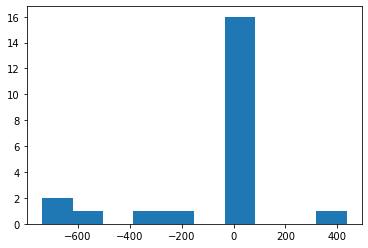

In [491]:
plt.hist(y_test - predictions)